## A few plots to show how the targets are distributed in our training dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
tstart = time.time()

In [3]:
df = pd.read_csv('data/train.csv')

### mean target at each time_id

Target means have been normalised to 0, and standard deviations normalised to unity. Can clearly be seen that time points with fewer measurements (at t~400) have much higher uncertainties in their measurements.

In [4]:
target_mean_by_time = df.groupby('time_id')['target'].mean()
target_std_by_time = df.groupby('time_id')['target'].std()
target_counts_by_time = df.groupby('time_id')['target'].count()

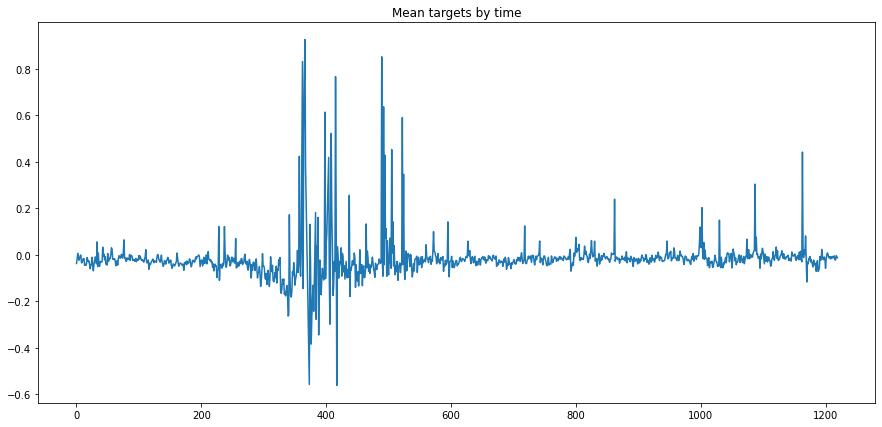

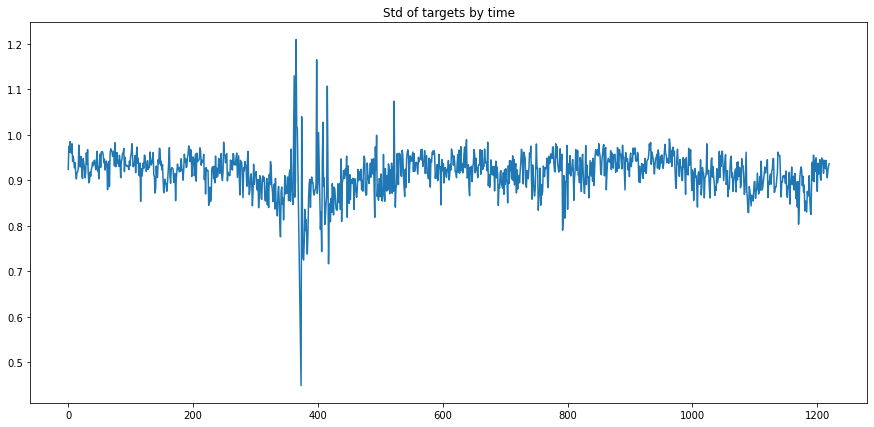

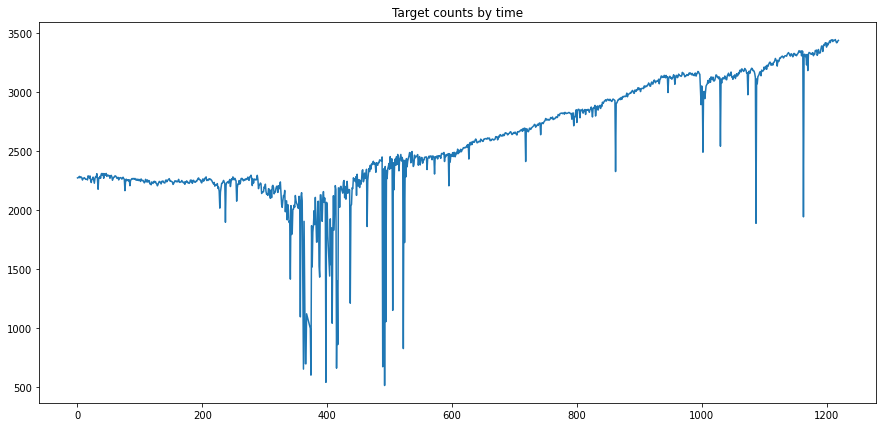

In [5]:
plt.figure(figsize=(15,7))
plt.title('Mean targets by time')
plt.plot(target_mean_by_time)
plt.show()

plt.figure(figsize=(15,7))
plt.title('Std of targets by time')
plt.plot(target_std_by_time)
plt.show()

plt.figure(figsize=(15,7))
plt.title('Target counts by time')
plt.plot(target_counts_by_time)
plt.show()

Can also be seen below. Mean of targets ~ 0 and std ~ 1. The targets have clearly been preprocessed and normalised.

Plot statistics
---------------
Mean: -0.02  -  Median: -0.10  -  Std: 0.92


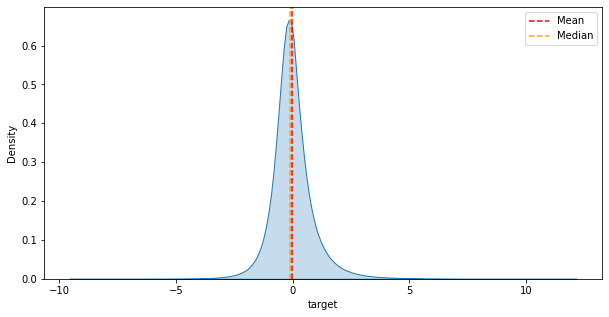

In [6]:
print("Plot statistics\n---------------")
print(f"Mean: {df['target'].mean():.2f}  -  Median: {df['target'].median():.2f}  -  Std: {df['target'].std():.2f}")

plt.figure(figsize=(10,5))

sns.kdeplot(df['target'], fill=True)
plt.axvline(df['target'].mean(), label='Mean', linestyle='--', color='r')
plt.axvline(df['target'].median(), label='Median', linestyle='--', color='orange')
plt.legend()

### Number of target (time) measuremnts for each investment

Over half of the investments have at least 1000 measurements.

In [7]:
investment_counts = df.groupby('investment_id')['target'].count()

Plot statistics
---------------
Total investments: 3579
Mean: 877.73  -  Median: 1009.00
Min: 2.0000  -  25%: 683.0000  -  50%: 1009.0000  -  75%: 1131.0000  -  Max: 1211.0000


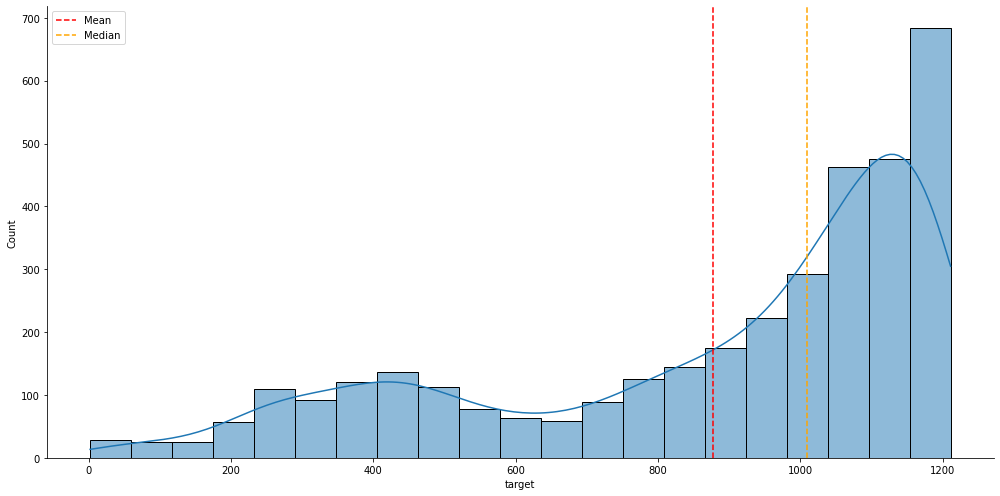

In [8]:
print("Plot statistics\n---------------")
print(f"Total investments: {len(investment_counts)}")
print(f"Mean: {investment_counts.mean():.2f}  -  Median: {investment_counts.median():.2f}")
print(f'Min: {investment_counts.min():.4f}  -  25%: {investment_counts.quantile(0.25):.4f}  -  50%: {investment_counts.quantile(0.5):.4f}  -  75%: {investment_counts.quantile(0.75):.4f}  -  Max: {investment_counts.max():.4f}')

sns.displot(investment_counts, height=7, aspect=2, kde=True)
plt.axvline(investment_counts.mean(), label='Mean', linestyle='--', color='r')
plt.axvline(investment_counts.median(), label='Median', linestyle='--', color='orange')
plt.legend()
plt.show()

**Insights:**

- Targets have been normalised to a mean of 0 and std of 1.
- Time points with fewer measurements have much higher uncertainty in target estimations.
- Most investments have at least 1000 measurements in time.


In [10]:
print(f'time to run full notebook: {(time.time()-tstart)/60.:.2f} minutes')

time to run full notebook: 5.60 minutes
